##Ritam Pramanik
###Matricola 973882

This project has as main task consists in creating a Emotion Detection model, able to recognise the emotion expressed in a given text/sentence using bag of words and pre-trained word embedding, the notebook will be splitted into 2 models. The dataset contains more than 58k texts labelled manually corresponding to one of seven classes (joy, neutral, surprise, anger, sadness, disgust, fear). In order to achieve a high performance in the classification we have to preprocess the instances by applying the wide variety of methods used in Natural Language Preprocessing 'NLP'.

Libraries we are using here:


1. nltk in text cleaning
2. pandas for data reading
3. numpy we need in preprocessing
4. re we needing it to clean the text data to remove some tages, spaces, simples, numbers, and punctuations
5. keras we needed to tokenize the text data, encode the data, apply the model, and padding the sequences
6. matplotlib visualization library used to plot the history of the model.
7. seaborn visualization library used to plot histogram to the positive and negative data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

!pip install nltk
!pip install WordCloud


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import csv #CommaSpaceVariable
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


###Exploratory Data Analysis:
The first step corresponds to explore the characteristics of the dataset, we will read the file, see the type of each column, drop the empty and null instances, compute the number of characters and words in the corpus of each topic, etc.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_ekmann.csv')
val=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/val_ekmann.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_ekmann.csv')

As we can see in above the instances contains 3 features from which Text,  Emotion are the most important in the main scope, let us see in more detail only these columns of the instances contained in the dataset and drop the Id column:

In [4]:
train.drop('Id', inplace=True, axis=1)
val.drop('Id', inplace=True, axis=1)
test.drop('Id', inplace=True, axis=1)

###Shape and count of Emotions of training dataset

In [5]:
train.shape

(43410, 2)

In [6]:
train["Emotion"].value_counts()

joy         16217
neutral     13146
surprise     5367
anger        4293
sadness      3058
disgust       768
fear          561
Name: Emotion, dtype: int64

###Shape and count of Validation dataset

In [7]:
val.shape

(5426, 2)

In [8]:
val["Emotion"].value_counts()

joy         2077
neutral     1638
surprise     624
anger        555
sadness      364
disgust       94
fear          74
Name: Emotion, dtype: int64

###Shape and count of Testing dataset

In [9]:
test.shape

(5427, 2)

In [10]:
test["Emotion"].value_counts()

joy         1978
neutral     1648
surprise     677
anger        572
sadness      355
disgust      116
fear          81
Name: Emotion, dtype: int64

##Plotting the datasets to visualize the data

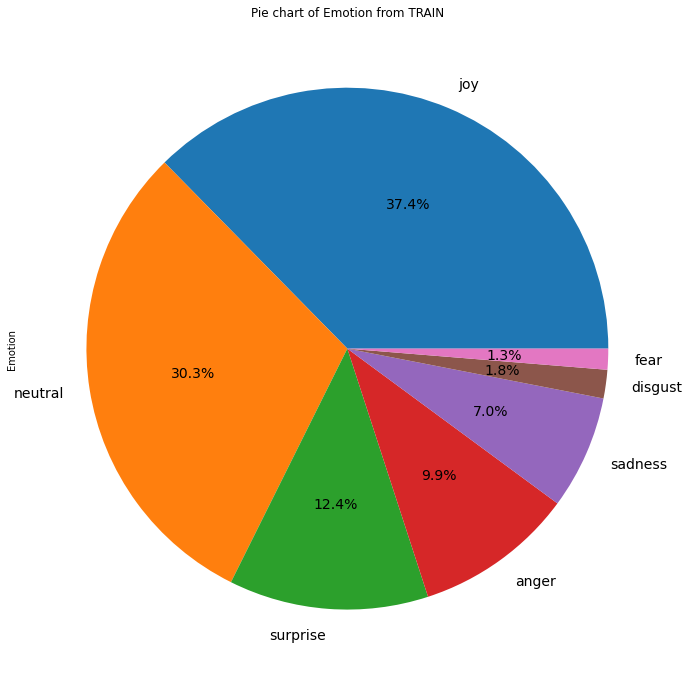

In [11]:
df_train=train.copy(deep=True)
pie1=pd.DataFrame(df_train['Emotion'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Emotion from TRAIN',y = 'Emotion', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

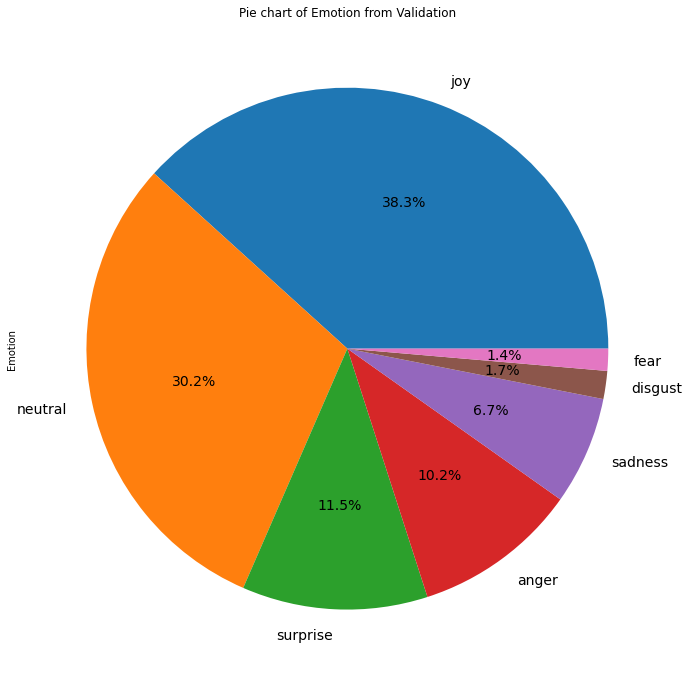

In [12]:
df_val=val.copy(deep=True)
pie1=pd.DataFrame(df_val['Emotion'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Emotion from Validation',y = 'Emotion', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

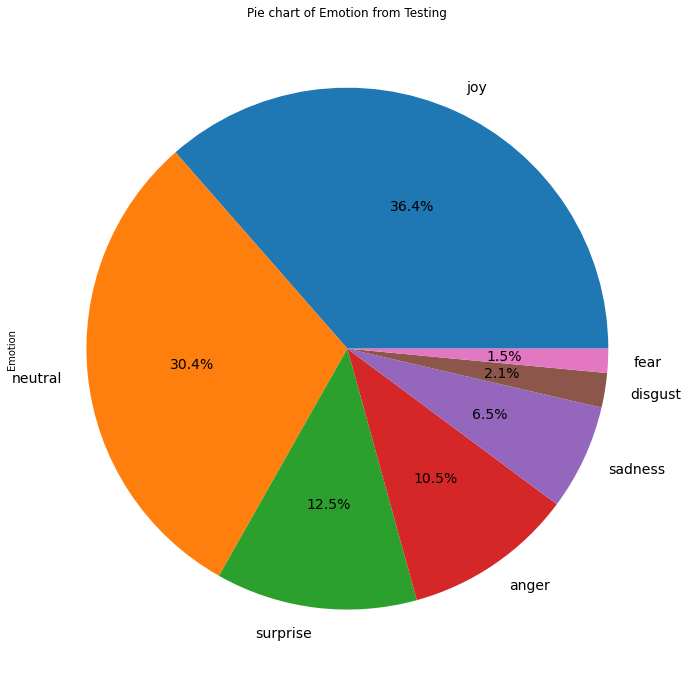

In [13]:
df_test=test.copy(deep=True)
pie1=pd.DataFrame(df_test['Emotion'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Emotion from Testing',y = 'Emotion', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

## Cleaning
### Preprocessing on the dataset
We have to consider that the instances included in the file are included with characters which are not significatively useful. This is why in the current step we will get rid of them so as to keep only the corpus or core data:

We perform lemmatization where our words are transformed from the form that they occur in the sentence to the form they occur in an ideal description. For example, the lemmatized output for the word ‘players’ is ‘player’. 

In the scope of topic classification such tags such as characters which are not alphanumeric and belong to tags used in social media are not significatively useful. This is why in the current step we will get rid of them so as to keep only the corpus or core data.

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
#WordNet Lemmatizer - Lemmatize using WordNet's built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.
wordnet_lemmatizer = WordNetLemmatizer()

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stopwords = stopwords.words('english')

def clean_text(text):
    text = lower_text(text)
    text = remove_number(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    return text

def remove_emoji(text):
    regex_pattern = re.compile("["                               
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U0001F1E6-\U0001F1FF"  # flags                              
                               "]+", flags=re.UNICODE)

    return regex_pattern.sub(r'', text)


def remove_email(text):
    return re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '', text)


def remove_repeated_char(text):
    return re.sub(r'(.)\1\1{1,}', r'\1\1', text)


def remove_account_tag(text):
    return re.sub(r'@[\w]+', '', text)


def remove_hashtag(text):
    return re.sub(r'#[\w]+', '', text)


def remove_links(text):
    return re.sub(r'http[^\s]+', '', text)


def remove_spaces(text):
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    return text


def remove_less_2_characters(text):
    return re.sub(r"\W*\b\w{1,2}\b", '', text)


def lemmatize(text):
    new_text = []
    tokenization = nltk.word_tokenize(text)
    for w in tokenization:
        tmp_w = wordnet_lemmatizer.lemmatize(w)
        if tmp_w is None:
            new_text.append(w)
        else:
            new_text.append(tmp_w)
    return " ".join(new_text)

def preprocess_text_cols(df, col):
    df[col] = df[col].apply(lambda x: preprocess_text_sample(x))
    return df

def preprocess_data(df, col):
    df = preprocess_text_cols(df, col)
    df.dropna(inplace=True)
    return df

def lower_text(text):
    return text.lower()

def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    return text
    
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

def preprocess_text_sample(text):
    text = remove_emoji(text)
    text = remove_email(text)
    text = remove_repeated_char(text)
    text = remove_account_tag(text)
    text = remove_hashtag(text)
    text = remove_links(text)
    text = remove_spaces(text)
    text = remove_less_2_characters(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = preprocess_text_cols(text)
    text = preprocess_data(text)
    text = lower_text(text)
    text = remove_number(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    return text


print('Before Preprocessing')
train.head()



Before Preprocessing


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Emotion
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger


In [16]:
train['Text'][:20]

0     My favourite food is anything I didn't have to...
1     Now if he does off himself, everyone will thin...
2                        WHY THE FUCK IS BAYLESS ISOING
3                           To make her feel threatened
4                                Dirty Southern Wankers
5     OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...
6     Yes I heard abt the f bombs! That has to be wh...
7     We need more boards and to create a bit more s...
8     Damn youtube and outrage drama is super lucrat...
9     It might be linked to the trust factor of your...
10    Demographics? I don’t know anybody under 35 wh...
11    Aww... she'll probably come around eventually,...
12    Hello everyone. Im from Toronto as well. Can c...
13    R/sleeptrain Might be time for some sleep trai...
14    [NAME] - same fucking problem, slightly better...
15    Shit, I guess I accidentally bought a Pay-Per-...
16                                     Thank you friend
17                                      Fucking 

In [17]:
print('After Preprocessing')
train['Text'][:20]

After Preprocessing


0     My favourite food is anything I didn't have to...
1     Now if he does off himself, everyone will thin...
2                        WHY THE FUCK IS BAYLESS ISOING
3                           To make her feel threatened
4                                Dirty Southern Wankers
5     OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...
6     Yes I heard abt the f bombs! That has to be wh...
7     We need more boards and to create a bit more s...
8     Damn youtube and outrage drama is super lucrat...
9     It might be linked to the trust factor of your...
10    Demographics? I don’t know anybody under 35 wh...
11    Aww... she'll probably come around eventually,...
12    Hello everyone. Im from Toronto as well. Can c...
13    R/sleeptrain Might be time for some sleep trai...
14    [NAME] - same fucking problem, slightly better...
15    Shit, I guess I accidentally bought a Pay-Per-...
16                                     Thank you friend
17                                      Fucking 

In [18]:
val['Text'][:20]

0     Is this in New Orleans?? I really feel like th...
1     You know the answer man, you are programmed to...
2                  I've never been this sad in my life!
3     The economy is heavily controlled and subsidiz...
4     He could have easily taken a real camera from ...
5     Thank you for your vote of confidence, but we ...
6     Wah Mum other people call me on my bullshit an...
7                                          There it is!
8     At least now [NAME] has more time to gain his ...
9     Good. We don't want more thrash liberal offspr...
10    It's better to say a moment like that could tr...
11    I went to a destination wedding being the only...
12                  He died 4 days later of dehydration
13    Like this just cuz of the [NAME] rhymes backgr...
14    Lol dream on buddy. You’ve had enough attentio...
15    As an anesthesia resident this made me blow ai...
16    1-2-3-4 I declare a thumb war! Dangit [NAME], ...
17    Did you hear the reason for this? Because 

We are building our model using different approaches such as bag of words and pre-trained word embedding.

Cleaning of sentences (remove of numbers), then remove the stop words (removing stop words would change the meaning of sentences) is done and finally building and train several bag-of-words models so as to find the best one.

Now that our data has been cleaned we can start the processes of building and tuning according to our dataset and task using the functional API of keras.

The input layer must consider the max_length of sequences, a dropout layer to reduce overfitting and finally a dense layer with number of neurons equal to number of classes in our label.

In [19]:
### --------- Import data --------- ###

# Select required columns
X_train = train['Text'].apply(clean_text)
y_train = train['Emotion']

X_test = test['Text'].apply(clean_text)
y_test = test['Emotion']

X_val = val['Text'].apply(clean_text)
y_val = val['Emotion']

In [20]:
X_train.head()

0                     favourite food anything ' cook .
1    himself, everyone think hes laugh screwing peo...
2                                  fuck bayless isoing
3                                 make feel threatened
4                               dirty southern wankers
Name: Text, dtype: object

In [21]:
y_train.head()

0    neutral
1    neutral
2      anger
3       fear
4      anger
Name: Emotion, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

###Modeling:
The following 3 Pre-trained 100 dimensional Glove models will be built and compared using their corresponding error measurements.
We will compare both by using their corresponding error metrics and showing their classification reports and confusion matrix:

As a first step we have to tokenize again the sentences without limiting the maximum length of them as follows:

tokenizing a text is splitting it into words or subwords, which then are converted to ids through a look-up table. 
texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers.

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
#with pd.concat perform data cleaning on both files together be concatenating them and then separating them.

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

X_train = pad_sequences(sequences_train, maxlen= 256, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen= 256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen= 256, truncating='pre')

vocabSize = len(tokenizer.word_index) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 28469


There are 28.469 unique words in the training sentences originally. We can see each one of the words sorted descendingly by calling the dictionary 'word_index'containing the tokens. As we know when we tokenize a relatively big dataset we expect that around half of the words hardly ever appear and because we can cut or select only a portion of the tokens so as to be more accurate and speed up the training process.


In [24]:
X_train.shape

(43410, 256)

In [25]:
X_test.shape

(5427, 256)

In [26]:
X_val.shape

(5426, 256)

Now, as we said we will download the weights of Glove 100 dimensional version from Stanford:

In [27]:
embedding_dictionary = dict()
with open('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt','r') as glove_file:
    for line in glove_file:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dictionary[word]=vectors
glove_file.close()

###creating embedding matrix
We will download the Glove pre-trained model for text classification with 100 embedding dimensions, after predicting the classes for the validation set we will compare with those obtained from the previously built scratch model.

The following lines creates a matrix containing the weights and its dimension is the new vocabulary size by 100 embedding dimension, this will be loaded as the weights of the first embedding layer by setting the argument trainable=False.

In [28]:
embedding_matrix = np.zeros((vocabSize, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None: 
        embedding_matrix[index] = embedding_vector

In [29]:
embedding_matrix.shape

(28469, 100)

Time now to build the models using the Glove-weights, the main reason why we decided to build 2 of this type of model is to try to find one which stands out significatively because of its architecture, specifically the layers used, later when comparing them we will see just a tiny difference.

# Pre-trained Model1

##Simple text classifier using own embedding:
Let us create a simple, but poweful model including the Embedding layer which comprehends the vocabulary size, input length and embedding dimensions, GlobalAveragePooling1D and 3 Dense layers with proper activation functions:

In [30]:
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Dropout

In [31]:
adam = Adam(learning_rate=0.005)
model = Sequential()
embedding_layer = Embedding(vocabSize, 100, weights=[embedding_matrix], input_length=256, trainable=False)

model.add(embedding_layer)
model.add(Bidirectional(LSTM(128,recurrent_dropout=0.4,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64,recurrent_dropout=0.3,return_sequences=True)))
model.add(Bidirectional(LSTM(40,recurrent_dropout=0.3,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation=LeakyReLU(alpha=0.2)))
model.add(Dropout(0.5))
model.add(Dense(32, activation=LeakyReLU(alpha=0.2)))

model.add(Dense(7, activation='sigmoid'))

model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1346500   
                                                                 
 bidirectional (Bidirectiona  (None, 256, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 80)               54080     
 nal)                                                            
                                                        

In [32]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

Ploting the model

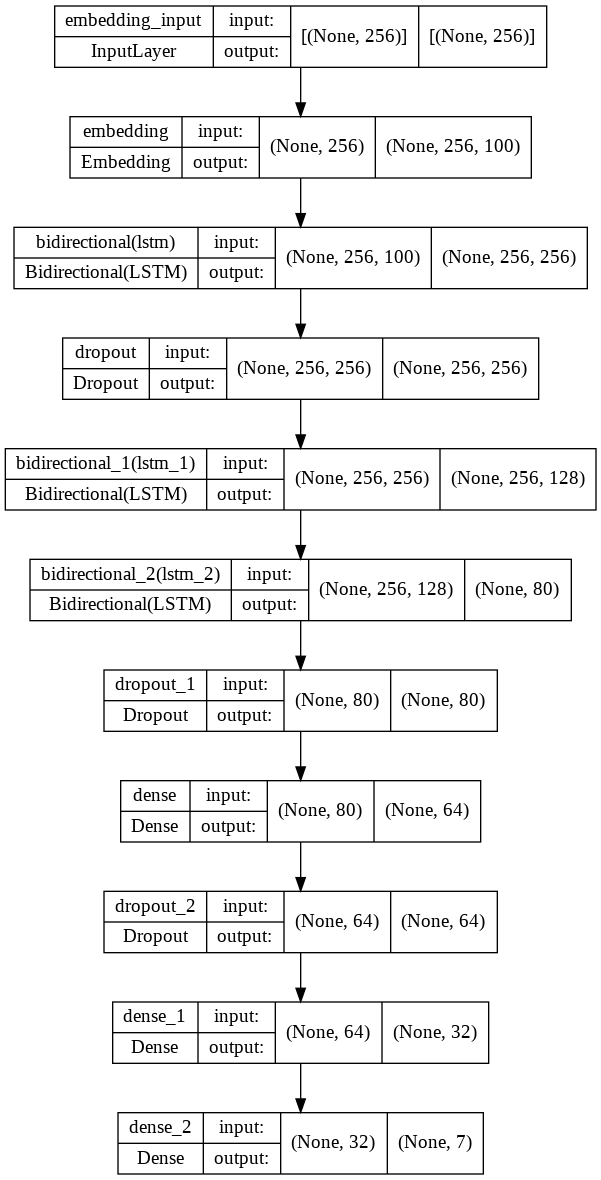

In [33]:
import tensorflow as tf
import keras

keras.utils.vis_utils.plot_model(model, show_shapes=True)

In [34]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=500,
                    epochs=10,
                    workers=50,
                    callbacks=[callback]
                   )

Epoch 1/10
20/20 [==============================] - 68s 3s/step - loss: 0.5345 - acc: 0.2700 - val_loss: 0.3592 - val_acc: 0.3793
Epoch 2/10
20/20 [==============================] - 56s 3s/step - loss: 0.3825 - acc: 0.3444 - val_loss: 0.3425 - val_acc: 0.3793
Epoch 3/10
20/20 [==============================] - 55s 3s/step - loss: 0.3615 - acc: 0.3497 - val_loss: 0.3407 - val_acc: 0.3793
Epoch 4/10
20/20 [==============================] - 55s 3s/step - loss: 0.3549 - acc: 0.3570 - val_loss: 0.3396 - val_acc: 0.3793
Epoch 5/10
20/20 [==============================] - 55s 3s/step - loss: 0.3517 - acc: 0.3599 - val_loss: 0.3391 - val_acc: 0.3793
Epoch 6/10
20/20 [==============================] - 56s 3s/step - loss: 0.3501 - acc: 0.3670 - val_loss: 0.3381 - val_acc: 0.3793
Epoch 7/10
20/20 [==============================] - 56s 3s/step - loss: 0.3453 - acc: 0.3949 - val_loss: 0.3323 - val_acc: 0.3983
Epoch 8/10
20/20 [==============================] - 56s 3s/step - loss: 0.3360 - acc: 0.43

In [35]:
def plot_metrics(record):
  epoch_range = range(1, len(record.history['acc'])+1)
  plt.plot(epoch_range, record.history['acc'])
  plt.plot(epoch_range, record.history['val_acc'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, record.history['loss'])
  plt.plot(epoch_range, record.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

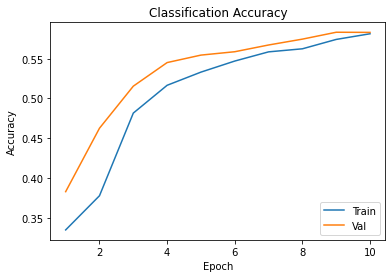

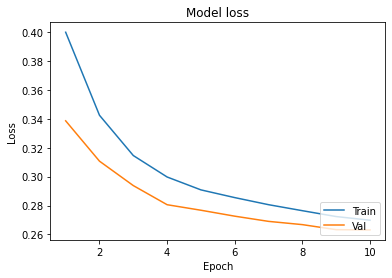

In [38]:
plot_metrics(history)

#Pre-trained model 2
Using categorical cross-entropy

Let us now create another simple, but poweful model including the Embedding layer which comprehends the vocabulary size, input length and embedding dimensions, GlobalAveragePooling1D and 1 Dense layer with proper activation functions and loss function as 'categorical crossentropy':

In [36]:
adam = Adam(learning_rate=0.005)

model2 = Sequential()
model2.add(Embedding(vocabSize, 100, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model2.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model2.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model2.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model2.add(Dense(7, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 100)          1346500   
                                                                 
 bidirectional_3 (Bidirectio  (None, 256, 512)         731136    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 256, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                      

In [37]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

In [40]:
history2 = model2.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=20,
                    callbacks=[callback]
                   )

Epoch 1/20
40/40 [==============================] - 281s 7s/step - loss: 1.3066 - accuracy: 0.5188 - val_loss: 1.1669 - val_accuracy: 0.5800
Epoch 2/20
40/40 [==============================] - 266s 7s/step - loss: 1.1664 - accuracy: 0.5731 - val_loss: 1.0623 - val_accuracy: 0.6123
Epoch 3/20
40/40 [==============================] - 267s 7s/step - loss: 1.1083 - accuracy: 0.5957 - val_loss: 0.9974 - val_accuracy: 0.6393
Epoch 4/20
40/40 [==============================] - 263s 7s/step - loss: 1.0693 - accuracy: 0.6082 - val_loss: 0.9669 - val_accuracy: 0.6500
Epoch 5/20
40/40 [==============================] - 261s 7s/step - loss: 1.0181 - accuracy: 0.6283 - val_loss: 0.9223 - val_accuracy: 0.6590
Epoch 6/20
40/40 [==============================] - 268s 7s/step - loss: 0.9883 - accuracy: 0.6371 - val_loss: 0.8423 - val_accuracy: 0.7007
Epoch 7/20
40/40 [==============================] - 261s 7s/step - loss: 0.9340 - accuracy: 0.6658 - val_loss: 0.7818 - val_accuracy: 0.7260
Epoch 8/20
40

In [41]:
def plot_metrics2(record):
  epoch_range = range(1, len(record.history['accuracy'])+1)
  plt.plot(epoch_range, record.history['accuracy'])
  plt.plot(epoch_range, record.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, record.history['loss'])
  plt.plot(epoch_range, record.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

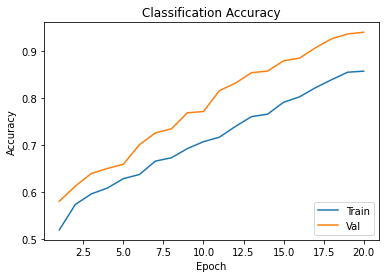

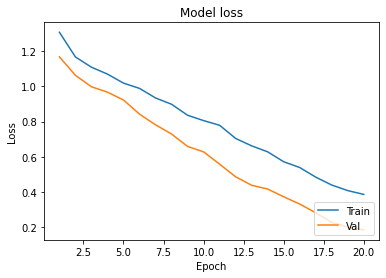

In [42]:
plot_metrics2(history2)

Fortunately the second model outperformed the other model and thus corresponds to the pre-trained model with the best metrics. However there is a couple of disadvantages because it took 40 minutes to train and in such time the accuracies did not overcome those obtained in the model with own embedding.

### Visualize Loss & Accuracy

Let us display the plots for the metrics of the second model, compute the classification report and show the confusion matrix to see in more detail all misclassifications.

In [43]:
import matplotlib.pyplot as plt

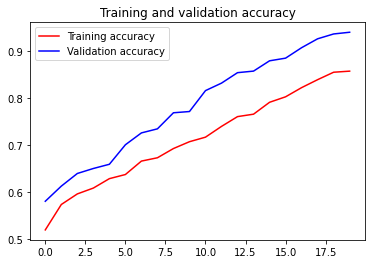

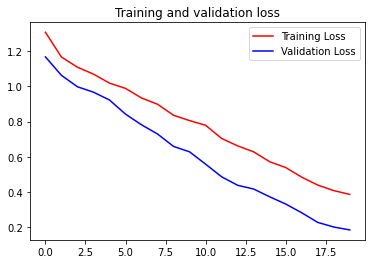

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Prediction

The loss and accuracy obtained were as expected and similar to validation set metrics, now we will predict the label for test instances as we traditionaly when building models with keras:

In [45]:
#model 1
y_test_arg=np.argmax(y_test,axis=1)
Y_pred1 = np.argmax(model.predict(X_test),axis=1)

In [46]:
#model 2
y_test_arg=np.argmax(y_test,axis=1)
Y_pred2 = np.argmax(model2.predict(X_test),axis=1)

## Metrics

Lets start with labelling the emotions

In [47]:
labelEmotions = {'neutral': 0, 'anger': 1, 'fear': 2, 'suprise': 3, 'joy': 4,'sadness': 5,'disgust':6}

In [48]:
from matplotlib.colors import LinearSegmentedColormap

In [49]:
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

def plot_confusion_matrix(matrix, fmt=''):
  plt.figure(figsize=(15, 15))
  sns.heatmap(matrix, annot=True, 
              cmap=cmap, 
              fmt=fmt, 
              xticklabels=labelEmotions.keys(), 
              yticklabels=labelEmotions.keys())
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()

##Confusion Matrix

Time now to display the classification report and confusion matrix showing the performance of the model predicting each class.

In [50]:
from sklearn import metrics

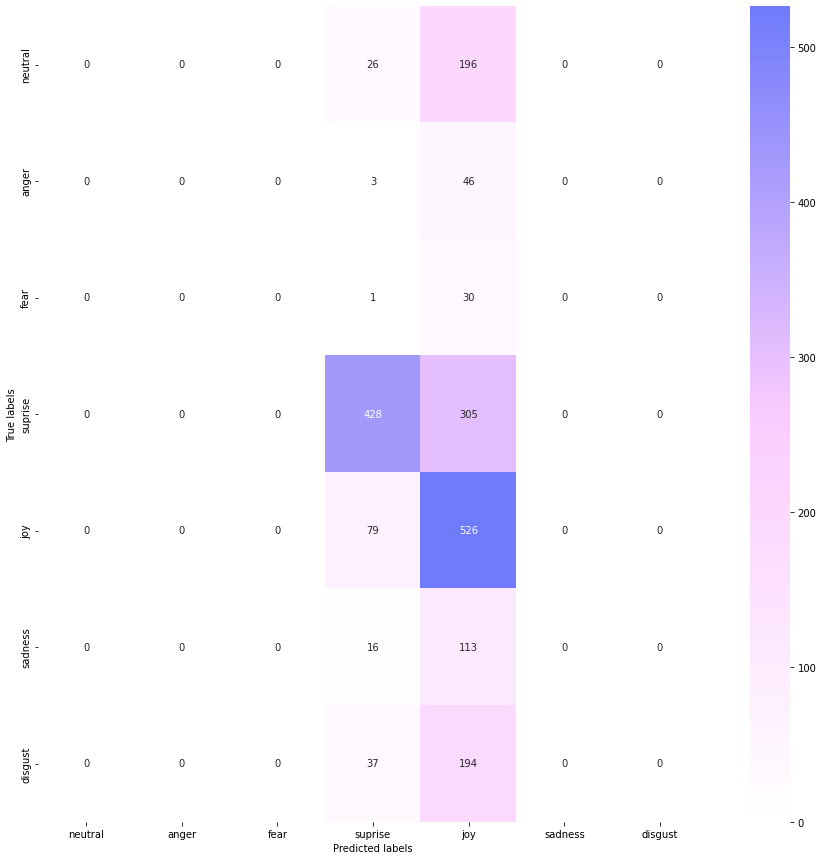

In [51]:
#Model 1
matrix=metrics.confusion_matrix(y_test_arg, Y_pred1)
plot_confusion_matrix(matrix)

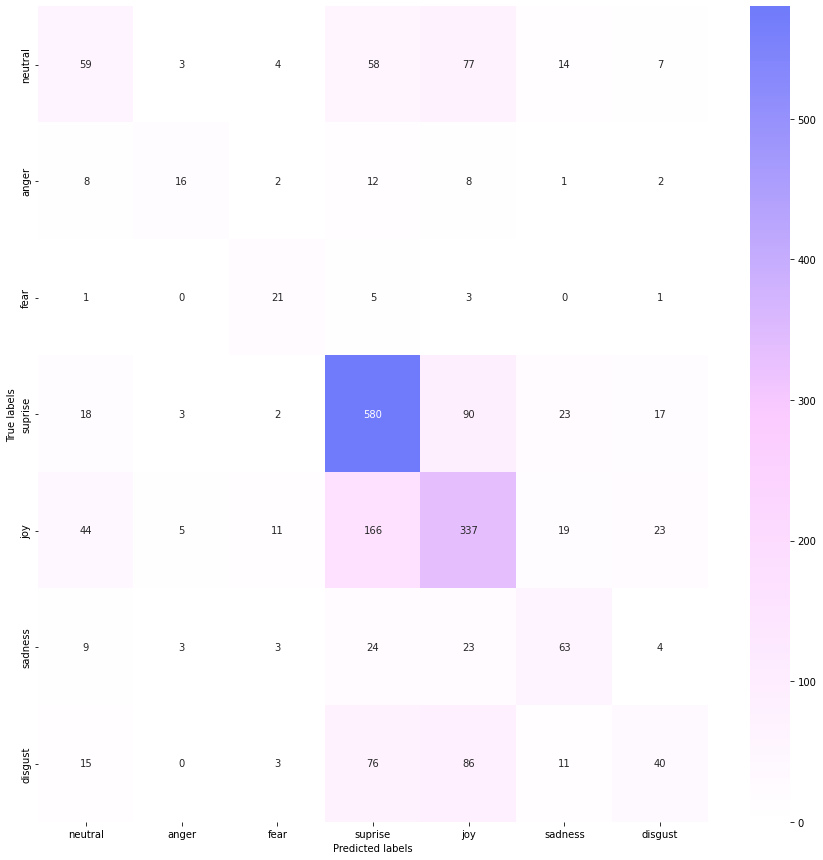

In [52]:
#Model 2
matrix=metrics.confusion_matrix(y_test_arg, Y_pred2)
plot_confusion_matrix(matrix)

##F1 score
Harmonic mean of precision and recall for a more balanced summarization of model performance.
The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.

In [53]:
#Model 1
print(metrics.classification_report(y_test_arg, Y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        31
           3       0.73      0.58      0.65       733
           4       0.37      0.87      0.52       605
           5       0.00      0.00      0.00       129
           6       0.00      0.00      0.00       231

    accuracy                           0.48      2000
   macro avg       0.16      0.21      0.17      2000
weighted avg       0.38      0.48      0.40      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#Model 2
print(metrics.classification_report(y_test_arg, Y_pred2))

              precision    recall  f1-score   support

           0       0.38      0.27      0.31       222
           1       0.53      0.33      0.41        49
           2       0.46      0.68      0.55        31
           3       0.63      0.79      0.70       733
           4       0.54      0.56      0.55       605
           5       0.48      0.49      0.48       129
           6       0.43      0.17      0.25       231

    accuracy                           0.56      2000
   macro avg       0.49      0.47      0.46      2000
weighted avg       0.54      0.56      0.54      2000



The f1-macro average score for Model 1 is defintely good and we get the value as 0.46